# 방향을 알아낼 수 있게
본 노트북은 CIR의 특성을 이용해, 각 신호의 반사파가 생긴 곳의 방향을 구별해내는 것을 목표로한다.

## data pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from data_EDA import get_data, same_peak, get_raw_data
from method import *

In [2]:
# get_data("지정하고 싶은 이름, "파일 이름")
get_raw_data("raw_data/R_anchor_2m_0m.csv", "20240819-203038_DecaWaveAllAccum_R_anchor_2m_0m.log")
get_raw_data("raw_data/R_anchor_2m_1_5m.csv", "20240819-210400_DecaWaveAllAccum_R_anchor_2m_1_5m.log")
get_raw_data("raw_data/R_tag_2m_0m.csv", "20240819-204659_DecaWaveAllAccum_R_tag_2m_0m.log")
get_raw_data("raw_data/R_tag_2m_1_5m.csv", "20240819-205521_DecaWaveAllAccum_R_tag_2m_1_5m.log")
get_raw_data("raw_data/L_anchor_2m_0m.csv", "20240819-211414_DecaWaveAllAccum_L_anchor_2m_0m.log")
get_raw_data("raw_data/L_anchor_2m_1_5m.csv", "20240819-213245_DecaWaveAllAccum_L_anchor_2m_1_5m.log")
get_raw_data("raw_data/L_tag_2m_0m.csv", "20240819-212655_DecaWaveAllAccum_L_tag_2m_0m.log")
get_raw_data("raw_data/L_tag_2m_1_5m.csv", "20240819-213858_DecaWaveAllAccum_L_tag_2m_1_5m.log")
get_raw_data("raw_data/ground_truth.csv", "20240819-214752_DecaWaveAllAccum_empty.log")

len(data_log):  583
not 1016:  3
after:  0
583
len(data_log):  803
not 1016:  9
after:  0
803
len(data_log):  634
not 1016:  3
after:  0
634
len(data_log):  783
not 1016:  3
after:  0
783
len(data_log):  799
not 1016:  6
after:  0
799
len(data_log):  686
not 1016:  12
after:  0
686
len(data_log):  630
not 1016:  10
after:  0
630
len(data_log):  648
not 1016:  3
after:  0
648
len(data_log):  709
not 1016:  10
after:  0
709


In [2]:
# data 불러오기
ra20 = pd.read_csv("raw_data/R_anchor_2m_0m.csv", index_col=0)
ra215 = pd.read_csv("raw_data/R_anchor_2m_1_5m.csv", index_col=0)
rt20 = pd.read_csv("raw_data/R_tag_2m_0m.csv", index_col=0)
rt215 = pd.read_csv("raw_data/R_tag_2m_1_5m.csv", index_col=0)
la20 = pd.read_csv("raw_data/L_anchor_2m_0m.csv", index_col=0)
la215 = pd.read_csv("raw_data/L_anchor_2m_1_5m.csv", index_col=0)
lt20 = pd.read_csv("raw_data/L_tag_2m_0m.csv", index_col=0)
lt215 = pd.read_csv("raw_data/L_tag_2m_1_5m.csv", index_col=0)
empty = pd.read_csv("raw_data/ground_truth.csv", index_col=0)

In [3]:
# 앞뒤의 20개 데이터 제거
ra20 = ra20[20:-20]
ra215 = ra215[20:-20]
rt20 = rt20[20:-20]
rt215 = rt215[20:-20]
la20 = la20[20:-20]
la215 = la215[20:-20]
lt20 = lt20[20:-20]
lt215 = lt215[20:-20]
empty = empty[20:-20]

This data all starts at different points in time. So we matched all points based on the highest neighborhood as follows

In [4]:
same_empty = same_peak(empty)
same_ra20 = same_peak(ra20)
same_ra215 = same_peak(ra215)
same_rt20 = same_peak(rt20)
same_rt215 = same_peak(rt215)
same_la20 = same_peak(la20)
same_la215 = same_peak(la215)
same_lt20 = same_peak(lt20)
same_lt215 = same_peak(lt215)

## Look the graph

In [44]:
plt.rcParams["figure.figsize"] = (14,4)

<Axes: >

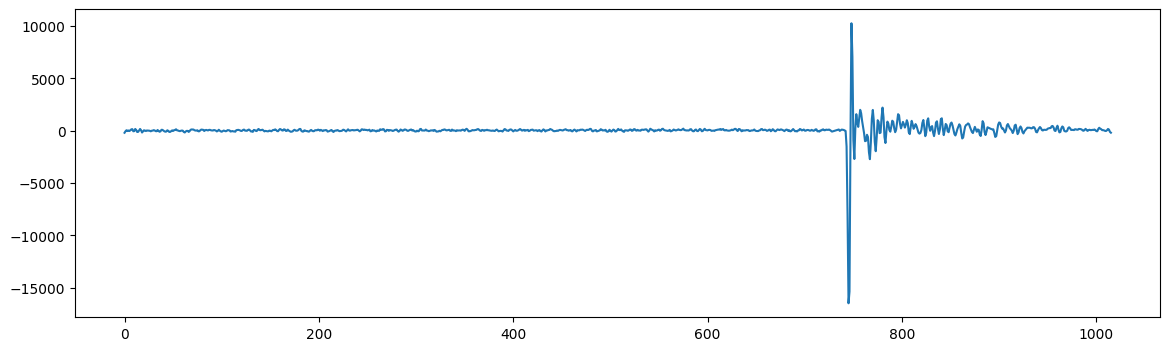

In [45]:
empty.iloc[10].plot()

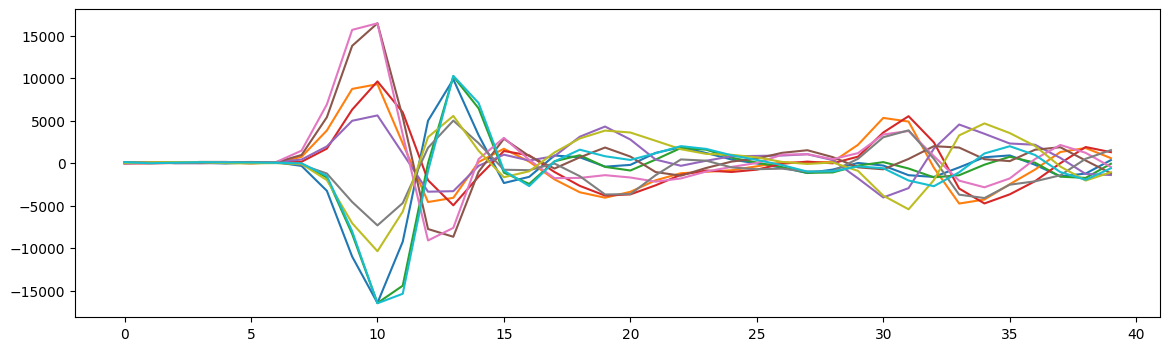

In [46]:
for i in range(0, 10):
    same_empty.iloc[i][:40].plot()

We saw the need to unify the directionality of the graph through absolute values.

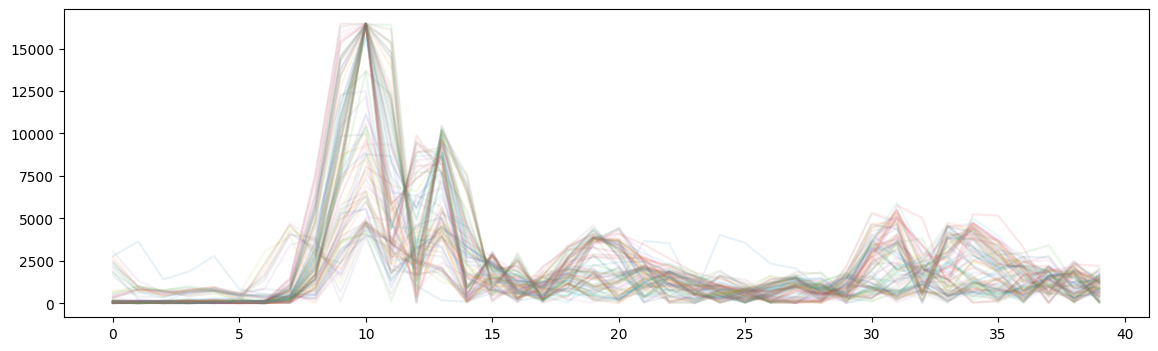

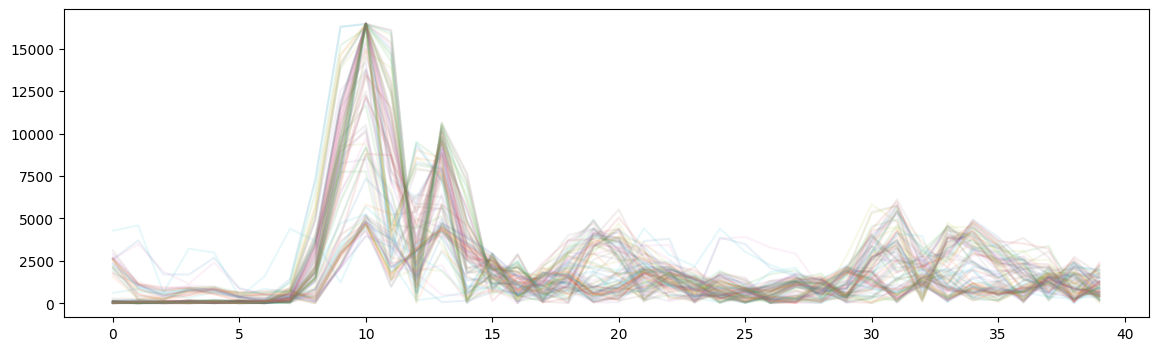

In [47]:
for i in range(0, 100):
    abs(same_empty.iloc[i][:40]).plot(alpha=0.1)
plt.show()
for i in range(0, 100):
    abs(same_ra20.iloc[i][:40]).plot(alpha=0.1)
plt.show()

최고값이 10000이상인 그래프만 정상으로 판단하고 보자  
이론상 직선 거리와 반사거리의 차이는 약 2.4ns이다  
Only graphs with peaks above 10000 are considered normal  
The theoretical difference between straight-line distance and reflected distance is about 2.4 ns

In [34]:
def is_over_10000(data):
    max_data = data.max()
    if max_data > 10000:
        return True
    else:
        return False

def over_is_good(data):
    for i in range(0, len(data)):
        if is_over_10000(data.iloc[i]):
            abs(data.iloc[i][:20]).plot(alpha=0.07)
    plt.show()
    
def all_print(data):
    for i in range(0, len(data)):
        abs(data.iloc[i][:20]).plot(alpha=0.03)
    plt.show()

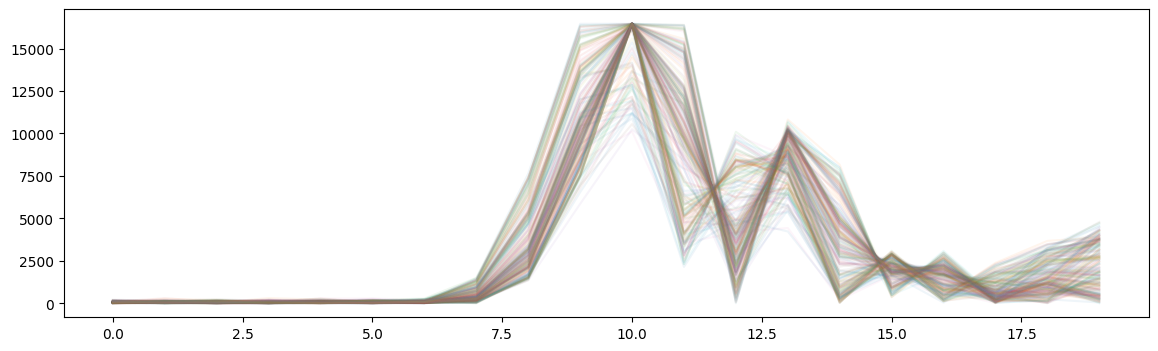

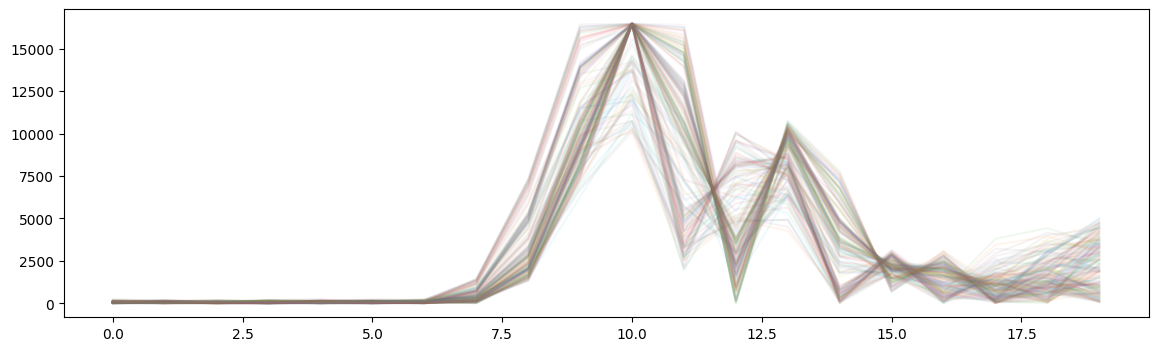

In [48]:
over_is_good(same_empty)
over_is_good(same_ra20)

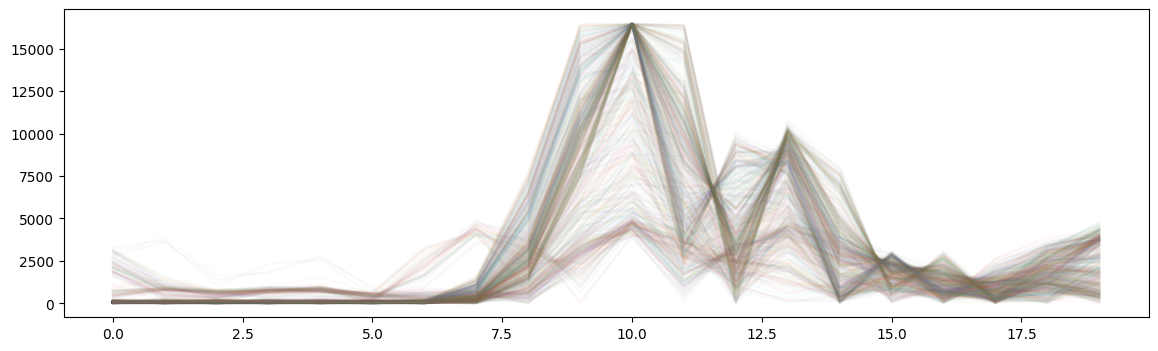

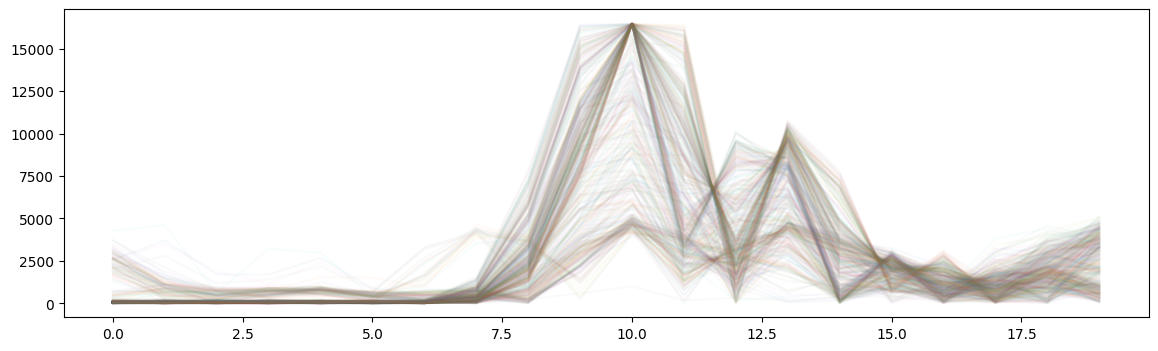

In [49]:
all_print(same_empty)
all_print(same_ra20)

솔직히 여기까지 봤을 때 육안으로는 두 그래프가 거의 비슷해보인다  
Honestly, at this point, the two graphs look pretty similar to the naked eye  

## Apply Novel NLOS Mitigation Algorithm

In [50]:
# example
print("total_energy: ", calculate_total_energy(same_empty.iloc[0][:40]))
print("max_amplitude: ", calculate_max_amplitude(same_empty.iloc[0][:40]))
print("normal_strongest_path_energy: ", calculate_normalized_strongest_path_energy(same_empty.iloc[0][:40]))
# print("signal-to-noise_ratio: ", calculate_signal_to_noise_ratio(same_empty.iloc[i][:40]))
# print("rise time: ", calculate_rise_time(same_empty.iloc[i][:40]))
print("kurtosis: ", calculate_kurtosis(same_empty.iloc[0][:40]))
# print("mean excess delay: ", calculate_mean_excess(same_empty.iloc[i][:40]))
# print("root-mean-square delay spread: ", calculate_root_mean_square(same_empty.iloc[i][:40]))

total_energy:  649167173
max_amplitude:  16448
normal_strongest_path_energy:  0.4167442767473395
kurtosis:  6.278778588990193


make a get_feature function

In [95]:
print(np.mean(calculate_total_energy(same_empty.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_ra20.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_ra215.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_rt20.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_rt215.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_la20.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_la215.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_lt20.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_lt215.iloc[0:500][:20]), axis=0))

71198218.33125
70096661.55
69066366.38125
75148316.2125
77346712.425
73500560.43125
56780108.6625
86571207.3375
77798486.75625


서로다른 상황에 대한 total energy 값은 별로 차이가 없어보인다  
The total energy values for different situations don't seem to differ much

<Axes: >

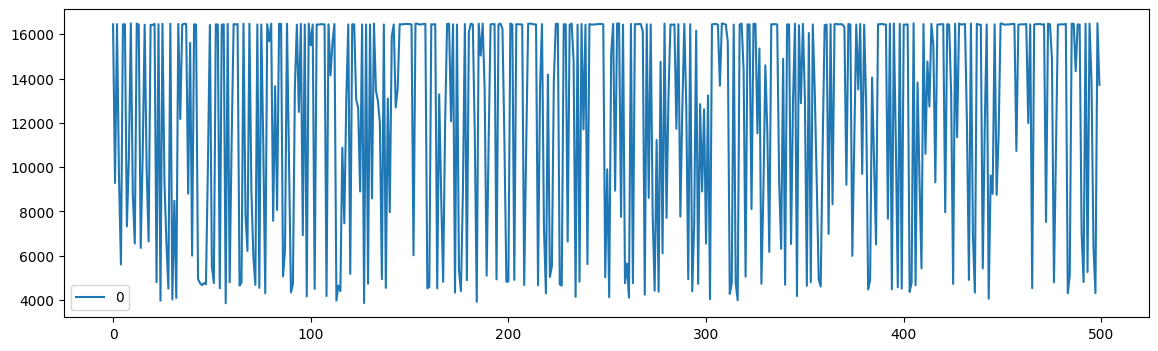

In [87]:
data = []
for i in range(0, 500):
    data.append(calculate_max_amplitude(same_empty.iloc[i][:40]))
data = pd.DataFrame(data)
data.plot()

In [98]:
# want to know the ratio of over 15000and under 15000
def over_15000(data):
    count = 0
    for i in range(0, len(data)):
        if is_over_10000(data.iloc[i]):
            count += 1
    return count
over_15000(same_empty)
over_15000(same_ra20)

188